In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter 
import numpy as np

## Eigenvalue distributions

In [2]:
df1 = pd.read_csv("SO50_large.csv",names=["angles"])

N = 20
n_samples = 200000

In [3]:
df2 = pd.read_csv("U50_large.csv", header=None)
df2 = df2.drop([50],axis=1)

In [4]:
df2.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [5]:
df2 = pd.Series(df2.values.ravel('F'))
df2

0         -3.082305
1         -3.015240
2         -3.036453
3         -3.052874
4         -3.012323
             ...   
4999995    3.067010
4999996    3.111400
4999997    2.975315
4999998    3.008811
4999999    3.066136
Length: 5000000, dtype: float64

In [6]:
df3 = pd.read_csv("Sp50_large.csv",header=None)
df3 = df3.drop([50],axis=1)
df3 = pd.Series(df3.values.ravel('F'))

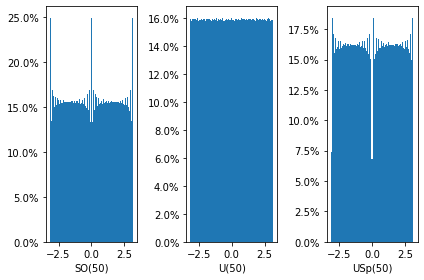

In [7]:
fig, axs = plt.subplots(1, 3, tight_layout=True)

n_bins=100

dist1 = df1["angles"]
dist2 = df2
dist3 = df3







axs[0].hist(dist1, bins=n_bins, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)
axs[2].hist(dist3, bins=n_bins, density=True)

#t = np.arange(-np.pi, np.pi, .01)
#s = (1 + np.sin( 8*np.pi * t) /16/np.pi / t)*(1/2/np.pi)
#axs[0].plot(t,s, 'k-', linewidth=1.5, label='Theoretical')



#t = np.arange(-np.pi, np.pi, .001)
#s = 1/2/np.pi + (t-t)
#axs[1].plot(t,s, 'k-', linewidth=1.5, label='Theoretical')

#t = np.arange(-np.pi, np.pi, .01)
#s = (1 - np.sin(8*np.pi * t) /14/np.pi / t)*(1/2/np.pi)
#axs[2].plot(t,s, 'k-', linewidth=1.5, label='Theoretical')



axs[0].set_xlabel('SO(50)')

axs[1].set_xlabel('U(50)')

axs[2].set_xlabel('USp(50)')

axs[0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[2].yaxis.set_major_formatter(PercentFormatter(xmax=1))

#plt.show()

plt.savefig("/home/ncr006/research/rmt-families/paper/images/distributions.png")

## Lowest zeros vs lowest eigenangle

In [15]:
# f is 3.8.a.a, weight 8 level 3 
df_f_3_8 = pd.read_csv("exp1-good-twists.csv",index_col=False)
df_f_3_8 = df_f_3_8.drop(["Unnamed: 0","Good"],axis=1)

In [16]:
df_f_3_8["Normalized lowest zero"] = df_f_3_8["Lowest positive zero"]/np.mean(df_f_3_8["Lowest positive zero"])

In [17]:
df_f_3_8.describe()

,Discriminant,Lowest zero,Second zero,Third zero,Lowest positive zero,Normalized lowest zero
count,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000
mean,20021.590829,0.112146,0.451771,0.791799,0.112146,1.000000
std,11515.471882,0.082634,0.119768,0.148040,0.082634,0.736845
min,13.000000,0.000022,0.126450,0.445596,0.000022,0.000193
25%,10021.750000,0.045783,0.370840,0.696541,0.045783,0.408241
50%,20006.500000,0.097181,0.444860,0.775273,0.097181,0.866553
75%,29986.000000,0.162758,0.522277,0.863801,0.162758,1.451306
max,39997.000000,0.588775,1.312649,3.228124,0.588775,5.250071


In [18]:
dfO = pd.read_csv("exp1-all-evs.csv")
dfO = dfO.drop(["Unnamed: 0"],axis=1)

In [19]:
dfO["Normalized lowest eigenvalue"] = dfO["ev1"]/np.mean(dfO["ev1"])

In [20]:
dfO.describe()

,N,ev1,Normalized lowest eigenvalue
count,455000.000000,4.550000e+05,455000.000000
mean,16.599560,1.100636e-01,1.000000
std,1.998925,8.064338e-02,0.732698
min,2.000000,7.165481e-07,0.000007
25%,16.000000,4.870766e-02,0.442541
50%,18.000000,9.831376e-02,0.893245
75%,18.000000,1.566272e-01,1.423061
max,18.000000,3.059592e+00,27.798398


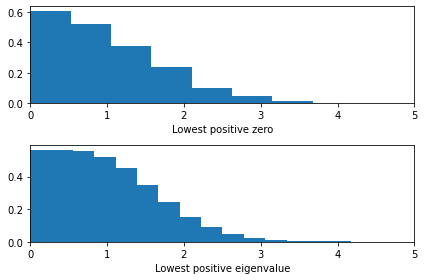

In [31]:
fig, axs = plt.subplots(2, 1, tight_layout=True)

n_bins=10

dist1 = df_f_3_8["Normalized lowest zero"]
dist2 = dfO["Normalized lowest eigenvalue"]


axs[0].hist(dist1, bins=n_bins, density=True)
axs[1].hist(dist2, bins=n_bins*10, density=True)

axs[0].set_xlabel('Lowest positive zero')

axs[1].set_xlabel('Lowest positive eigenvalue')

axs[0].set_xlim(0,5)

axs[1].set_xlim(0,5)

plt.savefig("/home/ncr006/research/rmt-families/paper/images/exp1.png")

In [10]:
# f is 13.2.e.a non self-dual but trivial character
df_f_13_2 = pd.read_csv("exp3-good-twists.csv",index_col=False)
df_f_13_2 = df_f_13_2.drop(["Unnamed: 0","Good"],axis=1)

In [11]:
df_f_13_2["Normalized lowest zero"] = df_f_13_2["Lowest positive zero"]/np.mean(df_f_13_2["Lowest positive zero"])

In [12]:
df_f_13_2.describe()

,Discriminant,Lowest zero,Second zero,Third zero,Lowest positive zero,Normalized lowest zero
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,20041.707212,0.209067,0.551996,0.884486,0.209067,1.000000
std,11511.358457,0.159784,0.183197,0.201295,0.159784,0.764272
min,33.000000,0.001360,0.063242,0.315280,0.001360,0.006503
25%,10264.000000,0.089585,0.423707,0.742311,0.089585,0.428499
50%,20092.000000,0.167986,0.512503,0.836829,0.167986,0.803506
75%,29881.000000,0.276730,0.648503,0.992121,0.276730,1.323644
max,39917.000000,0.846856,1.387400,1.945682,0.846856,4.050649


In [13]:
dfU = pd.read_csv("exp3-all-evs.csv")
dfU = dfU.drop(["Unnamed: 0"],axis=1)
dfU["Normalized lowest eigenvalue"] = dfU["ev1"]/np.mean(dfU["ev1"])


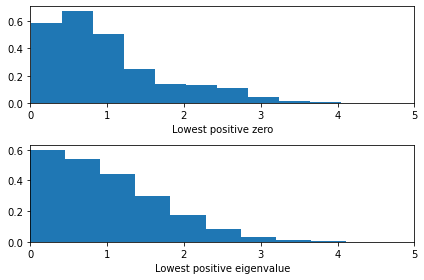

In [33]:
fig, axs = plt.subplots(2, 1, tight_layout=True)

n_bins=10

dist1 = df_f_13_2["Normalized lowest zero"]
dist2 = dfU["Normalized lowest eigenvalue"]


axs[0].hist(dist1, bins=n_bins, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)

axs[0].set_xlabel('Lowest positive zero')

axs[1].set_xlabel('Lowest positive eigenvalue')

axs[0].set_xlim(0,5)

axs[1].set_xlim(0,5)

plt.savefig("/home/ncr006/research/rmt-families/paper/images/exp3.png")

In [22]:
# f is 7.3.b.a weight 3 level 7, self-dual but nontrivial character
df_f_7_3 = pd.read_csv("exp2-good-twists.csv",index_col=False)
df_f_7_3 = df_f_7_3.drop(["Unnamed: 0","Good"],axis=1)

In [23]:
df_f_7_3["Normalized lowest zero"] = df_f_7_3["Lowest positive zero"]/np.mean(df_f_7_3["Lowest positive zero"])

In [24]:
df_f_7_3.describe()

,Discriminant,Lowest zero,Second zero,Third zero,Lowest positive zero,Normalized lowest zero
count,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000,5314.000000
mean,20016.608581,0.222739,0.538359,0.884277,0.222739,1.000000
std,11540.674045,0.086968,0.118815,0.165152,0.086968,0.390449
min,29.000000,0.010538,0.245657,0.554063,0.010538,0.047312
25%,10006.750000,0.159235,0.466110,0.788829,0.159235,0.714895
50%,20026.000000,0.217307,0.528928,0.855020,0.217307,0.975614
75%,29991.250000,0.280148,0.596056,0.941306,0.280148,1.257739
max,39993.000000,0.781105,1.987205,3.033634,0.781105,3.506821


In [27]:
dfSp = pd.read_csv("exp2-all-evs.csv")
dfSp = dfSp.drop(["Unnamed: 0"],axis=1)
dfSp["Normalized lowest eigenvalue"] = dfSp["V1"]/np.mean(dfSp["V1"])


In [28]:
dfSp.describe()

,V1,Normalized lowest eigenvalue
count,10000.000000,10000.000000
mean,0.327304,1.000000
std,0.135173,0.412989
min,0.022101,0.067523
25%,0.228511,0.698162
50%,0.316632,0.967395
75%,0.415496,1.269451
max,0.901053,2.752955


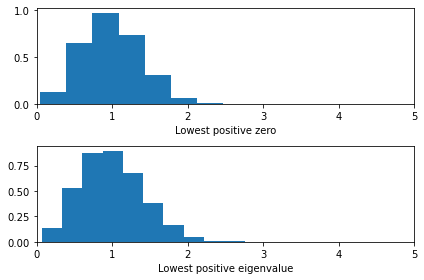

In [29]:
fig, axs = plt.subplots(2, 1, tight_layout=True)

n_bins=10

dist1 = df_f_7_3["Normalized lowest zero"]
dist2 = dfSp["Normalized lowest eigenvalue"]


axs[0].hist(dist1, bins=n_bins, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)

axs[0].set_xlabel('Lowest positive zero')

axs[1].set_xlabel('Lowest positive eigenvalue')

axs[0].set_xlim(0,5)

axs[1].set_xlim(0,5)

plt.savefig("/home/ncr006/research/rmt-families/paper/images/exp2.png")

## Repulsion for larger D

In [37]:
# f is 3.8.a.a, weight 8 level 3; orthogonal group
df_f_3_8 = pd.read_csv("exp1-good-twists.csv",index_col=False)
df_f_3_8 = df_f_3_8.drop(["Unnamed: 0","Good"],axis=1)
df_f_3_8["Normalized lowest zero"] = df_f_3_8["Lowest positive zero"]/np.mean(df_f_3_8["Lowest positive zero"])
dfO = pd.read_csv("exp1-all-evs.csv")
dfO = dfO.drop(["Unnamed: 0"],axis=1)
dfO["Normalized lowest eigenvalue"] = dfO["ev1"]/np.mean(dfO["ev1"])


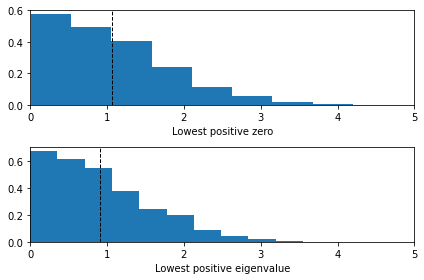

In [39]:
fig, axs = plt.subplots(2, 1, tight_layout=True)

n_bins=10

dist1 = df_f_3_8[df_f_3_8["Low"]==True]["Normalized lowest zero"]
dist2 = df_f_3_8[df_f_3_8["Low"]==False]["Normalized lowest zero"]

mean_dist1 = np.mean(dist1)
mean_dist2 = np.mean(dist2)

axs[0].hist(dist1, bins=n_bins, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)

axs[0].set_xlabel('Lowest positive zero, small discriminant')

axs[1].set_xlabel('Lowest positive zero, small discriminant')

axs[0].set_xlim(0,5)

axs[1].set_xlim(0,5)

axs[0].axvline(mean_dist1, color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_dist2, color='k', linestyle='dashed', linewidth=1)

plt.savefig("/home/ncr006/research/rmt-families/paper/images/exp1-lo-hi.png")

In [40]:
# f is 13.2.e.a non self-dual but trivial character
df_f_13_2 = pd.read_csv("exp3-good-twists.csv",index_col=False)
df_f_13_2 = df_f_13_2.drop(["Unnamed: 0","Good"],axis=1)
df_f_13_2["Normalized lowest zero"] = df_f_13_2["Lowest positive zero"]/np.mean(df_f_13_2["Lowest positive zero"])
dfU = pd.read_csv("exp3-all-evs.csv")
dfU = dfU.drop(["Unnamed: 0"],axis=1)
dfU["Normalized lowest eigenvalue"] = dfU["ev1"]/np.mean(dfU["ev1"])


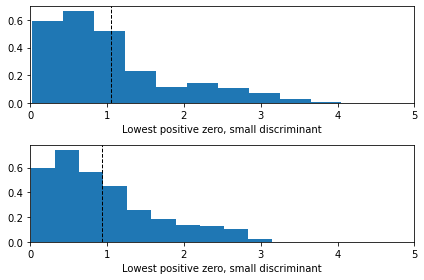

In [41]:
fig, axs = plt.subplots(2, 1, tight_layout=True)

n_bins=10

dist1 = df_f_13_2[df_f_13_2["Low"]==True]["Normalized lowest zero"]
dist2 = df_f_13_2[df_f_13_2["Low"]==False]["Normalized lowest zero"]

mean_dist1 = np.mean(dist1)
mean_dist2 = np.mean(dist2)

axs[0].hist(dist1, bins=n_bins, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)

axs[0].set_xlabel('Lowest positive zero, small discriminant')

axs[1].set_xlabel('Lowest positive zero, small discriminant')

axs[0].set_xlim(0,5)

axs[1].set_xlim(0,5)

axs[0].axvline(mean_dist1, color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_dist2, color='k', linestyle='dashed', linewidth=1)

plt.savefig("/home/ncr006/research/rmt-families/paper/images/exp3-lo-hi.png")

In [42]:
# f is 7.3.b.a weight 3 level 7, self-dual but nontrivial character
df_f_7_3 = pd.read_csv("exp2-good-twists.csv",index_col=False)
df_f_7_3 = df_f_7_3.drop(["Unnamed: 0","Good"],axis=1)
df_f_7_3["Normalized lowest zero"] = df_f_7_3["Lowest positive zero"]/np.mean(df_f_7_3["Lowest positive zero"])
dfSp = pd.read_csv("exp2-all-evs.csv")
dfSp = dfSp.drop(["Unnamed: 0"],axis=1)
dfSp["Normalized lowest eigenvalue"] = dfSp["V1"]/np.mean(dfSp["V1"])

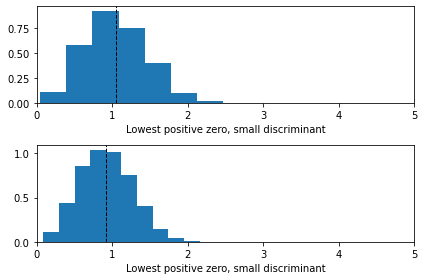

In [44]:
fig, axs = plt.subplots(2, 1, tight_layout=True)

n_bins=10

dist1 = df_f_7_3[df_f_7_3["Low"]==True]["Normalized lowest zero"]
dist2 = df_f_7_3[df_f_7_3["Low"]==False]["Normalized lowest zero"]

mean_dist1 = np.mean(dist1)
mean_dist2 = np.mean(dist2)

axs[0].hist(dist1, bins=n_bins, density=True)
axs[1].hist(dist2, bins=n_bins, density=True)

axs[0].set_xlabel('Lowest positive zero, small discriminant')

axs[1].set_xlabel('Lowest positive zero, small discriminant')

axs[0].set_xlim(0,5)

axs[1].set_xlim(0,5)

axs[0].axvline(mean_dist1, color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_dist2, color='k', linestyle='dashed', linewidth=1)

plt.savefig("/home/ncr006/research/rmt-families/paper/images/exp2-lo-hi.png")